In [17]:
import psycopg2
import pandas as pd

In [ ]:
  import os
  from dotenv import load_dotenv
  load_dotenv()
  # Set your credentials in a .env file in the project root.

In [2]:
conn = psycopg2.connect(
    dbname=os.environ["DB_NAME"],
    user=os.environ["DB_USER"],
    password=os.environ["DB_PASSWORD"],
    host=os.environ["DB_HOST"],
    port=os.environ.get("DB_PORT", "5432"),
)

cur = conn.cursor()
cur.execute("SELECT * FROM pev_app_placedbet")
rows = cur.fetchall()

for row in rows:
    print(row)

cur.close()
conn.close()

(1, 6.0, datetime.datetime(2024, 4, 29, 12, 15, 13, 237654, tzinfo=datetime.timezone.utc), 534157)
(2, 6.0, datetime.datetime(2024, 4, 29, 12, 28, 23, 699301, tzinfo=datetime.timezone.utc), 537017)
(3, 6.0, datetime.datetime(2024, 4, 29, 12, 30, 44, 975319, tzinfo=datetime.timezone.utc), 537017)
(4, 10.0, datetime.datetime(2024, 4, 29, 12, 35, 46, 291920, tzinfo=datetime.timezone.utc), 547218)
(5, 10.0, datetime.datetime(2024, 4, 29, 12, 36, 2, 245246, tzinfo=datetime.timezone.utc), 547218)
(6, 8.0, datetime.datetime(2024, 4, 29, 12, 38, 4, 886724, tzinfo=datetime.timezone.utc), 551925)
(7, 9.0, datetime.datetime(2024, 4, 29, 20, 48, 1, 914666, tzinfo=datetime.timezone.utc), 564415)
(8, 9.0, datetime.datetime(2024, 4, 29, 20, 48, 25, 726246, tzinfo=datetime.timezone.utc), 564415)
(9, 9.0, datetime.datetime(2024, 4, 29, 20, 50, 9, 969545, tzinfo=datetime.timezone.utc), 566501)
(10, 9.0, datetime.datetime(2024, 4, 29, 20, 50, 20, 5349, tzinfo=datetime.timezone.utc), 566501)
(11, 2.0, dat

In [7]:
import psycopg2

# Establish the connection
conn = psycopg2.connect(
    dbname="plus_ev_odds", user="ddawgs", password="Flashes3", host="localhost"
)

# Create a cursor object
cur = conn.cursor()

# Execute a JOIN query to fetch data from both tables
cur.execute(
    """
    SELECT p.*, r.*
    FROM pev_app_placedbet p
    JOIN pev_app_plusev r ON p.plus_ev_id = r.id
"""
)

# Fetch all the rows from the executed query
rows = cur.fetchall()

# Print each row
for row in rows:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()

(1, 6.0, datetime.datetime(2024, 4, 29, 12, 15, 13, 237654, tzinfo=datetime.timezone.utc), 534157, 534157, 'MLB', 'batter_hits', datetime.datetime(2024, 4, 29, 18, 7, tzinfo=datetime.timezone.utc), 'Kansas City Royals vs Toronto Blue Jays', 'George Springer', 'Over', 1.5, -0.0632, -0.0632, 0.0449, -0.0524, -0.0632, nan, -0.0596, 2.6, 2.6, 2.9, 2.63, 2.6, nan, 2.61, 'e2d961cd-7d5e-4f8b-ad11-640c8ef77e12', 0.3603, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
(2, 6.0, datetime.datetime(2024, 4, 29, 12, 28, 23, 699301, tzinfo=datetime.timezone.utc), 537017, 537017, 'MLB', 'batter_hits', datetime.datetime(2024, 4, 29, 18, 7, tzinfo=datetime.timezone.utc), 'Kansas City Royals vs Toronto Blue Jays', 'George Springer', 'Over', 1.5, -0.0655, -0.0655, 0.0423, -0.0547, -0.0655, nan, -0.0583, 2.6, 2.6, 2.9, 2.63, 2.6, nan, 2.62, 'e9fd41e5-daa2-4898-b1a5-68b33ae11115', 0.3594, None, None, None, None, None, None, None, None, None, None, None, None, None, None)


In [18]:
import psycopg2
import pandas as pd

# Establish the connection
conn = psycopg2.connect(
    dbname="plus_ev_odds", user="ddawgs", password="Flashes3", host="localhost"
)

# Define the query
query = """
    SELECT p.*, r.*
    FROM pev_app_placedbet p
    JOIN pev_app_plusev r ON p.plus_ev_id = r.id
"""

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# # Print the DataFrame
# print(df)

/var/folders/ys/r2pwxdmj5q950__b2swhs8gw0000gn/T/ipykernel_38163/4066173056.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [4]:
pd.set_option("display.max_columns", None)

In [12]:
df.columns

Index(['id', 'bet_amount', 'placed_date', 'plus_ev_id', 'id', 'sport',
       'market', 'date', 'event', 'description', 'outcome', 'point',
       'betmgm_ev', 'draftkings_ev', 'fanduel_ev', 'betrivers_ev', 'bovada_ev',
       'pinnacle_ev', 'average_ev', 'betmgm_odds', 'draftkings_odds',
       'fanduel_odds', 'betrivers_odds', 'bovada_odds', 'pinnacle_odds',
       'average_odds', 'pair_id', 'win_prob', 'betparx_odds', 'espnbet_ev',
       'espnbet_odds', 'hardrockbet_ev', 'hardrockbet_odds', 'superbook_ev',
       'superbook_odds', 'tipico_us_ev', 'tipico_us_odds', 'williamhill_us_ev',
       'williamhill_us_odds', 'windcreek_ev', 'windcreek_odds', 'betparx_ev'],
      dtype='object')

In [9]:
df.shape

(345, 42)

In [22]:
df.to_csv("placedbet_plus_ev.csv", index=False)

In [19]:
df.drop_duplicates(subset=["description", "date", "market"], inplace=True)

In [ ]:
ev_columns = [col for col in df.columns if col.endswith("_ev")]
df["best_ev"] = df[ev_columns].max(axis=1)

In [20]:
import pandas as pd

# Get the columns that have 'odds' in their name
odds_columns = [col for col in df.columns if "odds" in col]

df["best_odds"] = df[odds_columns].max(axis=1)

# Get the columns that have 'odds' in their name
ev_columns = [col for col in df.columns if col.endswith("_ev")]
df["best_ev"] = df[ev_columns].max(axis=1)

In [21]:
df

,id,bet_amount,placed_date,plus_ev_id,id,sport,market,date,event,description,outcome,point,betmgm_ev,draftkings_ev,fanduel_ev,betrivers_ev,bovada_ev,pinnacle_ev,average_ev,betmgm_odds,draftkings_odds,fanduel_odds,betrivers_odds,bovada_odds,pinnacle_odds,average_odds,pair_id,win_prob,betparx_odds,espnbet_ev,espnbet_odds,hardrockbet_ev,hardrockbet_odds,superbook_ev,superbook_odds,tipico_us_ev,tipico_us_odds,williamhill_us_ev,williamhill_us_odds,windcreek_ev,windcreek_odds,betparx_ev,best_odds,best_ev
0,1,6.0,2024-04-29 12:15:13.237654+00:00,534157,534157,MLB,batter_hits,2024-04-29 18:07:00+00:00,Kansas City Royals vs Toronto Blue Jays,George Springer,Over,1.5,-0.0632,-0.0632,0.0449,-0.0524,-0.0632,NaN,-0.0596,2.60,2.60,2.90,2.63,2.60,NaN,2.61,e2d961cd-7d5e-4f8b-ad11-640c8ef77e12,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,0.0449
3,4,10.0,2024-04-29 12:35:46.291920+00:00,547218,547218,NBA,player_points,2024-04-29 18:40:00+00:00,Boston Celtics vs Miami Heat,Kristaps Porzingis,Under,15.5,NaN,0.0530,NaN,-0.1210,NaN,NaN,-0.0585,NaN,2.36,NaN,1.97,NaN,NaN,2.11,ef3a0f9b-43bf-41e6-ac1c-d36acc668797,0.4462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.36,0.0530
5,6,8.0,2024-04-29 12:38:04.886724+00:00,551925,551925,MLB,batter_hits,2024-04-29 18:40:00+00:00,Tampa Bay Rays vs Milwaukee Brewers,Yandy Diaz,Over,1.5,-0.0813,-0.0813,0.0629,-0.0452,-0.0813,NaN,-0.0596,2.55,2.55,2.95,2.65,2.55,NaN,2.61,11b52d79-af94-4e80-87d4-982bdca1ea73,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.95,0.0629
6,7,9.0,2024-04-29 20:48:01.914666+00:00,564415,564415,MLB,batter_hits,2024-04-29 20:40:00+00:00,Atlanta Braves vs Seattle Mariners,Ronald Acuna Jr.,Over,1.5,-0.0758,-0.0758,-0.0120,0.0836,-0.0758,NaN,-0.0598,2.90,2.90,3.10,3.40,2.90,NaN,2.95,cabf267d-0c19-49dd-9732-b0db63a3e72e,0.3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.40,0.0836
8,9,9.0,2024-04-29 20:50:09.969545+00:00,566501,566501,MLB,batter_hits,2024-04-29 17:40:00+00:00,St. Louis Cardinals vs Detroit Tigers,Javier Baez,Over,1.5,-0.0777,-0.0933,0.0317,0.0943,-0.0933,NaN,-0.0652,2.95,2.90,3.30,3.50,2.90,NaN,2.99,c1c8627c-2bd5-4797-a9fd-5331c7ebed01,0.3126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,0.0943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,373,9.0,2024-05-16 14:18:48.461440+00:00,1490544,1490544,MLB,batter_runs_scored,2024-05-16 19:10:00+00:00,Oakland Athletics vs Houston Astros,Zack Gelof,Over,0.5,-0.0768,-0.0964,-0.0375,0.0607,NaN,NaN,-0.0650,2.35,2.30,2.45,2.70,NaN,NaN,2.38,51484aa0-856c-4135-a22d-f73d0b2798a9,0.3929,NaN,-0.0964,2.30,-0.0768,2.35,-0.0807,2.34,NaN,NaN,-0.1004,2.29,NaN,NaN,NaN,2.70,0.0607
373,374,7.0,2024-05-16 14:19:39.537209+00:00,1490432,1490432,MLB,batter_runs_scored,2024-05-16 19:10:00+00:00,Oakland Athletics vs Houston Astros,Max Schuemann,Over,0.5,-0.0651,-0.0651,0.0584,NaN,NaN,NaN,-0.0616,2.65,2.65,3.00,NaN,NaN,NaN,2.66,9e2ff7e6-871d-4baa-ac9f-fbe3e13c1b56,0.3528,NaN,-0.1180,2.50,-0.0827,2.60,-0.0757,2.62,NaN,NaN,-0.0863,2.59,NaN,NaN,NaN,3.00,0.0584
374,375,6.0,2024-05-16 14:20:09.657871+00:00,1490180,1490180,MLB,batter_rbis,2024-05-16 18:40:00+00:00,Pittsburgh Pirates vs Chicago Cubs,Yasmani Grandal,Over,0.5,-0.0734,-0.0891,0.0051,0.0522,NaN,NaN,-0.0672,2.95,2.90,3.20,3.35,NaN,NaN,2.97,04ad3234-29b8-4332-a6f3-473835cfd598,0.3141,NaN,-0.1206,2.80,-0.0891,2.90,-0.0891,2.90,NaN,NaN,-0.1268,2.78,NaN,NaN,NaN,3.35,0.0522
375,376,6.0,2024-05-16 14:20:51.457734+00:00,1489124,1489124,MLB,batter_rbis,2024-05-16 17:40:00+00:00,New York Mets vs Philadelphia Phillies,J. D. Martinez,Over,0.5,-0.0687,-0.0874,-0.0501,0.0430,NaN,NaN,-0.0650,2.50,2.45,2.55,2.80,NaN,NaN,2.51,f9435bd6-e854-4243-baa8-7891f6bf3c40,0.3725,NaN,-0.1060,2.40,-0.0687,2.50,-0.0762,2.48,NaN,NaN,-0.1097,2.39,NaN,NaN,NaN,2.80,0.0430


In [22]:
df.bet_amount.sum() * df.best_ev.mean()

80.48984999999999

In [21]:
df.best_ev.mean()

0.04628513513513513

In [16]:
(((df.bet_amount * df.best_odds) - df.bet_amount) * df.win_prob).sum()

1073.2341879999994

# Here we are going to test API-sports

In [23]:
sports_api_key = os.environ["SPORTS_API_KEY"]
apikey_token = os.environ["MYSPORTSFEEDS_API_KEY"]

In [28]:
import json

In [29]:
import http.client

conn = http.client.HTTPSConnection("v1.baseball.api-sports.io")

headers = {
    "x-rapidapi-host": "v1.baseball.api-sports.io",
    "x-rapidapi-key": sports_api_key,
}

conn.request("GET", "/leagues", headers=headers)

res = conn.getresponse()
data = res.read()

final_data = json.loads(data.decode("utf-8"))

# print(data.decode("utf-8"))

In [30]:
final_data

{'get': 'leagues',
 'parameters': [],
 'errors': [],
 'results': 70,
 'response': [{'id': 68,
   'name': 'Asia Professional Championship',
   'type': 'Cup',
   'logo': 'https://media.api-sports.io/baseball/leagues/68.png',
   'country': {'id': 25, 'name': 'Asia', 'code': None, 'flag': None},
   'seasons': [{'season': 2023,
     'current': False,
     'start': '2023-11-16',
     'end': '2023-11-19'}]},
  {'id': 32,
   'name': 'Asian Games',
   'type': 'League',
   'logo': 'https://media.api-sports.io/baseball/leagues/32.png',
   'country': {'id': 25,
    'name': 'Asia',
    'code': 'AS',
    'flag': 'https://media.api-sports.io/flags/as.svg'},
   'seasons': [{'season': 2023,
     'current': False,
     'start': '2023-09-26',
     'end': '2023-10-07'},
    {'season': 2018,
     'current': False,
     'start': '2018-08-21',
     'end': '2018-09-01'},
    {'season': 2014,
     'current': False,
     'start': '2014-09-22',
     'end': '2014-09-28'},
    {'season': 2010,
     'current': Fals

# Now trying with mySports Feeds

## Waiting for a response from them about personal use!

In [31]:
import base64
import requests

In [ ]:
# Install the Python Requests library:
# `pip install requests`


def send_request():
    # Request

    try:
        response = requests.get(
            url={pull - url},
            params={"fordate": "20161121"},
            headers={
                "Authorization": "Basic "
                + base64.b64encode(
                    "{}:{}".format({apikey_token}, MYSPORTSFEEDS).encode("utf-8")
                ).decode("ascii")
            },
        )
        print(
            "Response HTTP Status Code: {status_code}".format(
                status_code=response.status_code
            )
        )
        print("Response HTTP Response Body: {content}".format(content=response.content))
    except requests.exceptions.RequestException:
        print("HTTP Request failed")

In [33]:
apikey_token = "d76c9d2e-86d6-4bd2-bd30-0db1b3"
# MYSPORTSFEEDS = "X"
pull_url = "https://api.mysportsfeeds.com/v2.1/pull/mlb/current/date/20240509/player_gamelogs.json"

In [34]:
response = requests.get(
    url={pull_url},
    params={"fordate": "20240509"},
    headers={
        "Authorization": "Basic "
        + base64.b64encode(
            "{}:{}".format({apikey_token}, "MYSPORTSFEEDS").encode("utf-8")
        ).decode("ascii")
    },
)

InvalidSchema: No connection adapters were found for "{'https://api.mysportsfeeds.com/v2.1/pull/mlb/current/date/20240509/player_gamelogs.json'}"

# Analyze first month of data

In [80]:
final_df = pd.read_csv(
    "/Users/josh/Desktop/datadawgs/data_dawgs_web/analysis/notebooks/placedbet_plus_ev_final.csv"
)

In [81]:
final_df.rename(columns={"Profit/Loss": "profit_loss"}, inplace=True)

In [82]:
final_df

,date,placed_date,id,plus_ev_id,sport,description,market,event,outcome,point,rec_bet_amount,betmgm_ev,draftkings_ev,fanduel_ev,betrivers_ev,bovada_ev,pinnacle_ev,average_ev,betmgm_odds,draftkings_odds,fanduel_odds,betrivers_odds,bovada_odds,pinnacle_odds,average_odds,pair_id,win_prob,betparx_odds,espnbet_ev,espnbet_odds,hardrockbet_ev,hardrockbet_odds,superbook_ev,superbook_odds,tipico_us_ev,tipico_us_odds,williamhill_us_ev,williamhill_us_odds,windcreek_ev,windcreek_odds,betparx_ev,actual_bet_amount,win,best_odds,best_ev,american_odds,actual_decimal_odds,profit_loss
0,2024-04-29 18:07:00+00:00,2024-04-29 12:15:13.237654+00:00,534157.0,534157.0,MLB,George Springer,batter_hits,Kansas City Royals vs Toronto Blue Jays,Over,1.5,6,-0.0632,-0.0632,0.0449,-0.0524,-0.0632,NaN,-0.0596,2.60,2.60,2.90,2.63,2.60,NaN,2.61,e2d961cd-7d5e-4f8b-ad11-640c8ef77e12,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-1,2.90,0.0449,190.0,2.90,-6.0
1,2024-04-29 18:40:00+00:00,2024-04-29 12:35:46.291920+00:00,547218.0,547218.0,NBA,Kristaps Porzingis,player_points,Boston Celtics vs Miami Heat,Under,15.5,10,NaN,0.0530,NaN,-0.1210,NaN,NaN,-0.0585,NaN,2.36,NaN,1.97,NaN,NaN,2.11,ef3a0f9b-43bf-41e6-ac1c-d36acc668797,0.4462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,2.36,0.0530,136.0,2.36,13.6
2,2024-04-29 18:40:00+00:00,2024-04-29 12:38:04.886724+00:00,551925.0,551925.0,MLB,Yandy Diaz,batter_hits,Tampa Bay Rays vs Milwaukee Brewers,Over,1.5,8,-0.0813,-0.0813,0.0629,-0.0452,-0.0813,NaN,-0.0596,2.55,2.55,2.95,2.65,2.55,NaN,2.61,11b52d79-af94-4e80-87d4-982bdca1ea73,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-1,2.95,0.0629,190.0,2.90,-8.0
3,2024-04-29 20:40:00+00:00,2024-04-29 20:48:01.914666+00:00,564415.0,564415.0,MLB,Ronald Acuna Jr.,batter_hits,Atlanta Braves vs Seattle Mariners,Over,1.5,9,-0.0758,-0.0758,-0.0120,0.0836,-0.0758,NaN,-0.0598,2.90,2.90,3.10,3.40,2.90,NaN,2.95,cabf267d-0c19-49dd-9732-b0db63a3e72e,0.3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-1,3.40,0.0836,220.0,3.20,-9.0
4,2024-04-29 21:10:00+00:00,2024-04-29 21:28:49.822763+00:00,584420.0,584420.0,NBA,Nikola Jokic,player_rebounds,Los Angeles Lakers vs Denver Nuggets,Under,13.5,8,-0.1126,-0.0525,0.0327,-0.0625,-0.0826,-0.0525,-0.0625,1.77,1.89,2.06,1.87,1.83,1.89,1.87,42589953-805b-492e-9c75-5a98403764d9,0.5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-1,2.06,0.0327,106.0,2.06,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2024-05-16 19:35:00+00:00,2024-05-16 14:21:27.678911+00:00,1488234.0,1488234.0,NBA,Kentavious Caldwell-Pope,player_steals,Denver Nuggets vs Minnesota Timberwolves,Over,1.5,4,-0.0767,-0.0441,NaN,0.0319,-0.0767,NaN,-0.0622,2.55,2.64,NaN,2.85,2.55,NaN,2.59,c7536f75-1d73-41b9-b58b-47b996456b7f,0.3621,NaN,-0.1129,2.45,-0.0767,2.55,NaN,NaN,NaN,NaN,-0.0876,2.52,NaN,NaN,NaN,4,-1,2.85,0.0319,NaN,2.85,-4.0
410,2024-05-16 19:10:00+00:00,2024-05-16 14:19:39.537209+00:00,1490432.0,1490432.0,MLB,Max Schuemann,batter_runs_scored,Oakland Athletics vs Houston Astros,Over,0.5,7,-0.0651,-0.0651,0.0584,NaN,NaN,NaN,-0.0616,2.65,2.65,3.00,NaN,NaN,NaN,2.66,9e2ff7e6-871d-4baa-ac9f-fbe3e13c1b56,0.3528,NaN,-0.1180,2.50,-0.0827,2.60,-0.0757,2.62,NaN,NaN,-0.0863,2.59,NaN,NaN,NaN,7,-1,3.00,0.0584,NaN,3.00,-7.0
411,2024-05-16 12:10:00+00:00,2024-05-16 11:05:07.745173+00:00,1482578.0,1482578.0,MLB,Willi Castro,batter_rbis,New York Yankees vs Minnesota Twins,Over,0.5,11,-0.0912,-0.0756,-0.1226,0.1124,NaN,NaN,-0.0662,2.90,2.95,2.80,3.55,NaN,NaN,2.98,db7b1def-5e56-4368-b98f-0748d449fda9,0.3134,NaN,-0.1069,2.85,-0.0912,2.90,NaN,NaN,NaN,NaN,-0.0912,2.90,NaN,NaN,NaN,11,-1,3.55,0.1124,NaN,3.55,-11.0
412,2024-05-16 18:40:00+00:00,2024-05-16 14:20:09.657871+00:00,1490180.0,1490180.0,MLB,Yasmani Grandal,batter_rbis,Pittsburgh Pirates vs Chicago Cubs,Over,0.5,6,-0.0734,-0.

In [83]:
final_df["day"] = pd.to_datetime(final_df["date"]).dt.date

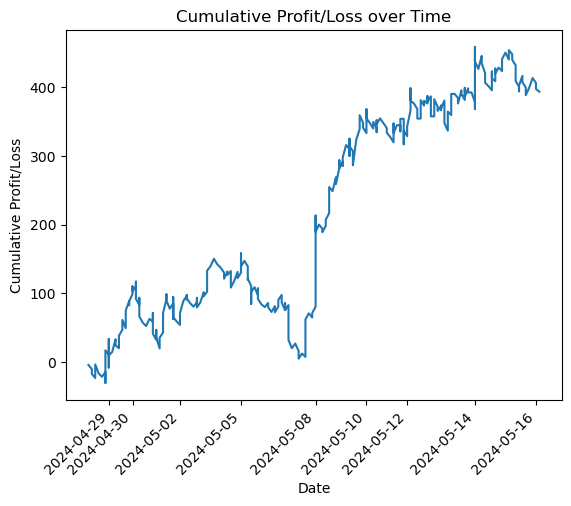

In [84]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Sort the dataframe by date
final_df_sorted = final_df.sort_values("date")

# Calculate the cumulative sum of profit_loss
final_df_sorted["cumulative_profit_loss"] = final_df_sorted["profit_loss"].cumsum()

# Plot the graph
fig, ax = plt.subplots()
ax.plot(final_df_sorted["date"], final_df_sorted["cumulative_profit_loss"])

# Limit the number of ticks on the x-axis to 10
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

# Get the positions and labels for the x-ticks
tick_positions = final_df_sorted.index[:: len(final_df_sorted) // 8]
tick_labels = final_df_sorted["day"].iloc[tick_positions]

# Set the tick positions and labels
ax.set_xticks(final_df_sorted["date"].iloc[tick_positions])
ax.set_xticklabels(tick_labels, rotation=45, ha="right")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Cumulative Profit/Loss")
plt.title("Cumulative Profit/Loss over Time")

# Show the plot
plt.show()

In [85]:
final_df.groupby("market")["profit_loss"].sum().to_frame()

,profit_loss
market,
alternate_spreads,0.25
batter_hits,29.22
batter_home_runs,8.75
batter_rbis,-14.77
batter_runs_scored,-3.10
batter_total_bases,29.09
h2h,-10.00
h2h_1st_3_innings,4.40
h2h_1st_5_innings,-4.00


In [86]:
final_df["cumulative_profit_loss"] = final_df["profit_loss"].cumsum()

In [87]:
final_df.groupby("day")["profit_loss"].sum().to_frame()

,profit_loss
day,
2024-04-29,9.75
2024-04-30,82.51
2024-05-01,-20.73
2024-05-02,0.09
2024-05-03,61.52
2024-05-04,-10.80
2024-05-05,-38.11
2024-05-06,2.58
2024-05-07,-15.33


In [88]:
final_df.groupby("day").agg({"cumulative_profit_loss": "last"})

,cumulative_profit_loss
day,
2024-04-29,9.75
2024-04-30,92.26
2024-05-01,71.53
2024-05-02,71.62
2024-05-03,133.14
2024-05-04,122.34
2024-05-05,84.23
2024-05-06,86.81
2024-05-07,71.48


In [91]:
final_df.loc[final_df.market == "batter_home_runs"]

,date,placed_date,id,plus_ev_id,sport,description,market,event,outcome,point,rec_bet_amount,betmgm_ev,draftkings_ev,fanduel_ev,betrivers_ev,bovada_ev,pinnacle_ev,average_ev,betmgm_odds,draftkings_odds,fanduel_odds,betrivers_odds,bovada_odds,pinnacle_odds,average_odds,pair_id,win_prob,betparx_odds,espnbet_ev,espnbet_odds,hardrockbet_ev,hardrockbet_odds,superbook_ev,superbook_odds,tipico_us_ev,tipico_us_odds,williamhill_us_ev,williamhill_us_odds,windcreek_ev,windcreek_odds,betparx_ev,actual_bet_amount,win,best_odds,best_ev,american_odds,actual_decimal_odds,profit_loss,day,cumulative_profit_loss
215,2024-05-08 18:20:00+00:00,NaN,NaN,NaN,MLB,Aaron Judge,batter_home_runs,NaN,Over,0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN,215.0,3.15,10.75,2024-05-08,145.79
242,2024-05-10 17:50:00+00:00,2024-05-10 13:48:50.418830+00:00,993551.0,993551.0,MLB,Aaron Judge,batter_home_runs,New York Yankees vs Tampa Bay Rays,Over,0.5,12,-0.0118,-0.0941,0.1200,-0.0118,NaN,-0.104,-0.0612,3.0,2.75,3.4,3.00,NaN,2.72,2.85,bf37b96e-6a93-476a-a838-38dd7ee9bba8,0.3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,-1,3.4,0.1200,NaN,3.40,-12.00,2024-05-10,236.76
284,2024-05-12 12:40:00+00:00,2024-05-12 11:15:23.953568+00:00,1127213.0,1127213.0,MLB,Aaron Judge,batter_home_runs,New York Yankees vs Tampa Bay Rays,Over,0.5,9,NaN,-0.0719,0.0709,-0.0540,NaN,NaN,-0.0612,NaN,2.60,3.0,2.65,NaN,NaN,2.63,dfed984e-9c69-496b-a697-027c4fde956b,0.3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,3.0,0.0709,NaN,3.00,18.00,2024-05-12,345.73
407,2024-05-16 12:10:00+00:00,2024-05-16 11:05:37.857224+00:00,1482306.0,1482306.0,MLB,Aaron Judge,batter_home_runs,New York Yankees vs Minnesota Twins,Over,0.5,8,0.0044,-0.0928,0.0692,-0.0118,NaN,-0.096,-0.0604,3.1,2.80,3.3,3.05,NaN,2.79,2.90,b2dbabd3-3343-4334-b000-5411205c5f4f,0.3240,NaN,-0.1414,2.65,-0.1252,2.7,NaN,NaN,NaN,NaN,-0.0928,2.8,NaN,NaN,NaN,8,-1,3.3,0.0692,NaN,3.30,-8.00,2024-05-16,399.45


In [96]:
total_profit = final_df["profit_loss"].sum()
# Calculate ROI for each bet market
roi_market = (
    final_df.groupby("market")["profit_loss"].sum()
    / final_df.groupby("market")["actual_bet_amount"].sum()
    * 100
)

# Calculate ROI for each day
roi_day = (
    final_df.groupby("day")["profit_loss"].sum()
    / final_df.groupby("day")["actual_bet_amount"].sum()
    * 100
)

# Calculate overall ROI
total_profit = final_df["profit_loss"].sum()
total_bet_amount = final_df["actual_bet_amount"].sum()
roi_overall = (total_profit / total_bet_amount) * 100

# Print the results
print("ROI for each bet market:")
print(roi_market)
print("\nROI for each day:")
print(roi_day)
print("\nOverall ROI:")
print(roi_overall)
total_bet_amount = final_df["actual_bet_amount"].sum()

roi = (total_profit / total_bet_amount) * 100

ROI for each bet market:
market
alternate_spreads                   0.781250
batter_hits                         2.698061
batter_home_runs                   25.735294
batter_rbis                        -4.516820
batter_runs_scored                 -0.652632
batter_total_bases                 10.774074
h2h                              -100.000000
h2h_1st_3_innings                  40.000000
h2h_1st_5_innings                -100.000000
pitcher_outs                     -100.000000
pitcher_strikeouts                 46.257218
player_assists                     -9.805825
player_blocks                    -100.000000
player_goals                       46.250000
player_points                      43.129412
player_points_rebounds           -100.000000
player_points_rebounds_assists     33.904762
player_rebounds                     7.888889
player_steals                     110.727273
player_threes                      78.918919
totals_1st_3_innings              100.000000
dtype: float64

ROI for

In [99]:
final_df.groupby("market")["profit_loss"].sum() / final_df.groupby("market")[
    "actual_bet_amount"
].sum() * 100

market
alternate_spreads                   0.781250
batter_hits                         2.698061
batter_home_runs                   25.735294
batter_rbis                        -4.516820
batter_runs_scored                 -0.652632
batter_total_bases                 10.774074
h2h                              -100.000000
h2h_1st_3_innings                  40.000000
h2h_1st_5_innings                -100.000000
pitcher_outs                     -100.000000
pitcher_strikeouts                 46.257218
player_assists                     -9.805825
player_blocks                    -100.000000
player_goals                       46.250000
player_points                      43.129412
player_points_rebounds           -100.000000
player_points_rebounds_assists     33.904762
player_rebounds                     7.888889
player_steals                     110.727273
player_threes                      78.918919
totals_1st_3_innings              100.000000
dtype: float64

In [102]:
grouped_df = final_df.groupby('market').agg(
    total_profit_loss=('profit_loss', 'sum'),
    total_actual_bet_amount=('actual_bet_amount', 'sum'),
    number_of_bets=('market', 'count')
).reset_index()

# Calculate ROI for each market
grouped_df['roi'] = grouped_df['total_profit_loss'] / grouped_df['total_actual_bet_amount']

In [103]:
grouped_df

,market,total_profit_loss,total_actual_bet_amount,number_of_bets,roi
0,alternate_spreads,0.25,32,8,0.007812
1,batter_hits,29.22,1083,125,0.026981
2,batter_home_runs,8.75,34,4,0.257353
3,batter_rbis,-14.77,327,38,-0.045168
4,batter_runs_scored,-3.10,475,50,-0.006526
5,batter_total_bases,29.09,270,33,0.107741
6,h2h,-10.00,10,1,-1.000000
7,h2h_1st_3_innings,4.40,11,2,0.400000
8,h2h_1st_5_innings,-4.00,4,1,-1.000000
9,pitcher_outs,-5.00,5,1,-1.000000


In [104]:
grouped_df2 = final_df.groupby('day').agg(
    total_profit_loss=('profit_loss', 'sum'),
    total_actual_bet_amount=('actual_bet_amount', 'sum'),
    number_of_bets=('market', 'count')
).reset_index()

# Calculate ROI for each market
grouped_df2['roi'] = grouped_df2['total_profit_loss'] / grouped_df2['total_actual_bet_amount']

In [105]:
grouped_df2

,day,total_profit_loss,total_actual_bet_amount,number_of_bets,roi
0,2024-04-29,9.75,239,31,0.040795
1,2024-04-30,82.51,213,32,0.387371
2,2024-05-01,-20.73,194,25,-0.106856
3,2024-05-02,0.09,143,16,0.000629
4,2024-05-03,61.52,124,19,0.496129
5,2024-05-04,-10.80,107,15,-0.100935
6,2024-05-05,-38.11,213,25,-0.178920
7,2024-05-06,2.58,67,11,0.038507
8,2024-05-07,-15.33,241,24,-0.063610
9,2024-05-08,118.30,192,26,0.616146


In [107]:
final_df

,date,placed_date,id,plus_ev_id,sport,description,market,event,outcome,point,rec_bet_amount,betmgm_ev,draftkings_ev,fanduel_ev,betrivers_ev,bovada_ev,pinnacle_ev,average_ev,betmgm_odds,draftkings_odds,fanduel_odds,betrivers_odds,bovada_odds,pinnacle_odds,average_odds,pair_id,win_prob,betparx_odds,espnbet_ev,espnbet_odds,hardrockbet_ev,hardrockbet_odds,superbook_ev,superbook_odds,tipico_us_ev,tipico_us_odds,williamhill_us_ev,williamhill_us_odds,windcreek_ev,windcreek_odds,betparx_ev,actual_bet_amount,win,best_odds,best_ev,american_odds,actual_decimal_odds,profit_loss,day,cumulative_profit_loss
0,2024-04-29 18:07:00+00:00,2024-04-29 12:15:13.237654+00:00,534157.0,534157.0,MLB,George Springer,batter_hits,Kansas City Royals vs Toronto Blue Jays,Over,1.5,6,-0.0632,-0.0632,0.0449,-0.0524,-0.0632,NaN,-0.0596,2.60,2.60,2.90,2.63,2.60,NaN,2.61,e2d961cd-7d5e-4f8b-ad11-640c8ef77e12,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-1,2.90,0.0449,190.0,2.90,-6.0,2024-04-29,-6.00
1,2024-04-29 18:40:00+00:00,2024-04-29 12:35:46.291920+00:00,547218.0,547218.0,NBA,Kristaps Porzingis,player_points,Boston Celtics vs Miami Heat,Under,15.5,10,NaN,0.0530,NaN,-0.1210,NaN,NaN,-0.0585,NaN,2.36,NaN,1.97,NaN,NaN,2.11,ef3a0f9b-43bf-41e6-ac1c-d36acc668797,0.4462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,2.36,0.0530,136.0,2.36,13.6,2024-04-29,7.60
2,2024-04-29 18:40:00+00:00,2024-04-29 12:38:04.886724+00:00,551925.0,551925.0,MLB,Yandy Diaz,batter_hits,Tampa Bay Rays vs Milwaukee Brewers,Over,1.5,8,-0.0813,-0.0813,0.0629,-0.0452,-0.0813,NaN,-0.0596,2.55,2.55,2.95,2.65,2.55,NaN,2.61,11b52d79-af94-4e80-87d4-982bdca1ea73,0.3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-1,2.95,0.0629,190.0,2.90,-8.0,2024-04-29,-0.40
3,2024-04-29 20:40:00+00:00,2024-04-29 20:48:01.914666+00:00,564415.0,564415.0,MLB,Ronald Acuna Jr.,batter_hits,Atlanta Braves vs Seattle Mariners,Over,1.5,9,-0.0758,-0.0758,-0.0120,0.0836,-0.0758,NaN,-0.0598,2.90,2.90,3.10,3.40,2.90,NaN,2.95,cabf267d-0c19-49dd-9732-b0db63a3e72e,0.3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-1,3.40,0.0836,220.0,3.20,-9.0,2024-04-29,-9.40
4,2024-04-29 21:10:00+00:00,2024-04-29 21:28:49.822763+00:00,584420.0,584420.0,NBA,Nikola Jokic,player_rebounds,Los Angeles Lakers vs Denver Nuggets,Under,13.5,8,-0.1126,-0.0525,0.0327,-0.0625,-0.0826,-0.0525,-0.0625,1.77,1.89,2.06,1.87,1.83,1.89,1.87,42589953-805b-492e-9c75-5a98403764d9,0.5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-1,2.06,0.0327,106.0,2.06,-8.0,2024-04-29,-17.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2024-05-16 19:35:00+00:00,2024-05-16 14:21:27.678911+00:00,1488234.0,1488234.0,NBA,Kentavious Caldwell-Pope,player_steals,Denver Nuggets vs Minnesota Timberwolves,Over,1.5,4,-0.0767,-0.0441,NaN,0.0319,-0.0767,NaN,-0.0622,2.55,2.64,NaN,2.85,2.55,NaN,2.59,c7536f75-1d73-41b9-b58b-47b996456b7f,0.3621,NaN,-0.1129,2.45,-0.0767,2.55,NaN,NaN,NaN,NaN,-0.0876,2.52,NaN,NaN,NaN,4,-1,2.85,0.0319,NaN,2.85,-4.0,2024-05-16,406.25
410,2024-05-16 19:10:00+00:00,2024-05-16 14:19:39.537209+00:00,1490432.0,1490432.0,MLB,Max Schuemann,batter_runs_scored,Oakland Athletics vs Houston Astros,Over,0.5,7,-0.0651,-0.0651,0.0584,NaN,NaN,NaN,-0.0616,2.65,2.65,3.00,NaN,NaN,NaN,2.66,9e2ff7e6-871d-4baa-ac9f-fbe3e13c1b56,0.3528,NaN,-0.1180,2.50,-0.0827,2.60,-0.0757,2.62,NaN,NaN,-0.0863,2.59,NaN,NaN,NaN,7,-1,3.00,0.0584,NaN,3.00,-7.0,2024-05-16,399.25
411,2024-05-16 12:10:00+00:00,2024-05-16 11:05:07.745173+00:00,1482578.0,1482578.0,MLB,Willi Castro,batter_rbis,New York Yankees vs Minnesota Twins,Over,0.5,11,-0.0912,-0.0756,-0.1226,0.1124,NaN,NaN,-0.0662,2.90,2.95,2.80,3.55,NaN,NaN,2.98,db7b1def-5e56-4368-b98f-0748d449fda9,0.3134,NaN,-0.1069,2.85,-0.0912,2.90,NaN,NaN,NaN,NaN,-0.0912,2.90,NaN,NaN,NaN,11,-1,3.55,0.1124,NaN,3.55,-11.0,2024-05-16,388.2

In [108]:
bins = [0, 2.0, float("inf")]
labels = ["<= 2.0", "> 2.0"]
final_df["odds_category"] = pd.cut(
    final_df["actual_decimal_odds"], bins=bins, labels=labels
)

# Group by the new odds_category column and calculate the required metrics
grouped_df3 = (
    final_df.groupby("odds_category")
    .agg(
        total_profit_loss=("profit_loss", "sum"),
        total_actual_bet_amount=("actual_bet_amount", "sum"),
        number_of_bets=("actual_decimal_odds", "count"),
    )
    .reset_index()
)

# Calculate ROI for each odds category
grouped_df3["roi"] = (
    grouped_df3["total_profit_loss"] / grouped_df3["total_actual_bet_amount"]
)

/var/folders/ys/r2pwxdmj5q950__b2swhs8gw0000gn/T/ipykernel_38163/1927576378.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df3 = final_df.groupby('odds_category').agg(


In [109]:
grouped_df3

,odds_category,total_profit_loss,total_actual_bet_amount,number_of_bets,roi
0,<= 2.0,-20.26,356,35,-0.056910
1,> 2.0,413.61,3004,379,0.137686


In [112]:
bins = [0, 2.0, float("inf")]
labels = ["favorites", "underdogs"]
final_df["odds_category"] = pd.cut(
    final_df["actual_decimal_odds"], bins=bins, labels=labels, right=False
)

# Group by the new odds_category column and calculate the required metrics
grouped_df4 = (
    final_df.groupby("odds_category")
    .agg(
        total_profit_loss=("profit_loss", "sum"),
        total_actual_bet_amount=("actual_bet_amount", "sum"),
        number_of_bets=("actual_decimal_odds", "count"),
    )
    .reset_index()
)

# Calculate ROI for each odds category
grouped_df4["roi"] = (
    grouped_df4["total_profit_loss"] / grouped_df4["total_actual_bet_amount"]
)

/var/folders/ys/r2pwxdmj5q950__b2swhs8gw0000gn/T/ipykernel_38163/2964444887.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby("odds_category")


In [113]:
grouped_df4

,odds_category,total_profit_loss,total_actual_bet_amount,number_of_bets,roi
0,favorites,-17.26,300,28,-0.057533
1,underdogs,410.61,3060,386,0.134186


In [115]:
final_df.loc[~final_df.best_ev.isna()].best_ev.mean()

0.05215718232044199

In [117]:
final_df.loc[~final_df.best_ev.isna()].best_ev.mean() * final_df.loc[
    ~final_df.best_ev.isna()
].actual_bet_amount.sum()

154.3852596685083

In [118]:
final_df.loc[~final_df.best_ev.isna()].best_ev.mean() * final_df.actual_bet_amount.sum()

175.24813259668508

In [119]:
final_df.loc[~final_df.best_ev.isna()].profit_loss.sum()

250.82

In [ ]:
I need a bar graph that shows one bar = final_df.loc[~final_df.best_ev.isna()].best_ev.mean() * final_df.loc[
    ~final_df.best_ev.isna()
].actual_bet_amount.sum() and another bar = final_df.loc[~final_df.best_ev.isna()].profit_loss.sum()

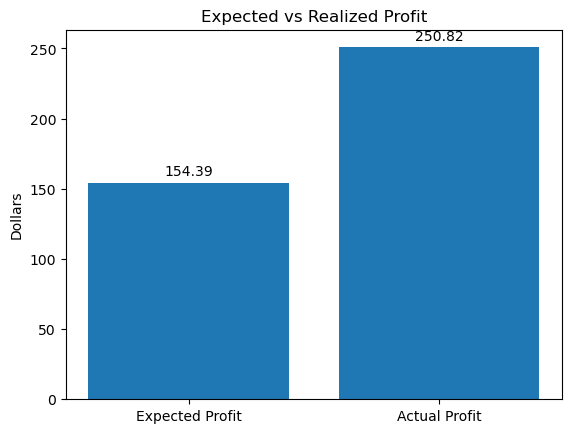

In [122]:
import matplotlib.pyplot as plt

# Calculate the values for the bars
bar1_value = (
    final_df.loc[~final_df.best_ev.isna()].best_ev.mean()
    * final_df.loc[~final_df.best_ev.isna()].actual_bet_amount.sum()
)
bar2_value = final_df.loc[~final_df.best_ev.isna()].profit_loss.sum()

# Create the bar graph
fig, ax = plt.subplots()
bars = ax.bar(["Expected Profit", "Actual Profit"], [bar1_value, bar2_value])

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f"{height:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Add a title and labels to the axes
ax.set_title("Expected vs Realized Profit")
# ax.set_xlabel('Bars')
ax.set_ylabel("Dollars")

# Display the bar graph
plt.show()

In [123]:
0.4 * 200

80.0